#### Libraries

In [1]:
# linear algebra
import numpy as np                 

#visualization
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from prettytable import PrettyTable

# Exercise 1: Analytical exercises

# Exercise 2: Making your own data and exploring scikit-learn

In [2]:
'''''

Le librerie le ho messe tutte nella cella iniziale, penso sia un po' più ordinato, 
quindi le toglierei da qui, se mi dici che non ti piace allora le divido

'''''

# # LIBRARIES
# import numpy as np
# import matplotlib.pyplot as plt
# from prettytable import PrettyTable


# PARAMETERS
n = 100         # Number of elements
p = 3           # Number of features

# INPUT DATA
# We are creating an array of size (n, 1), 
# in which every element is sampled from a uniform distribution over [0, 1).
x = np.random.rand(n, 1)

# OUTPUT DATA
y = 2.0 + 5*x*x + 0.1*np.random.randn(n, 1)

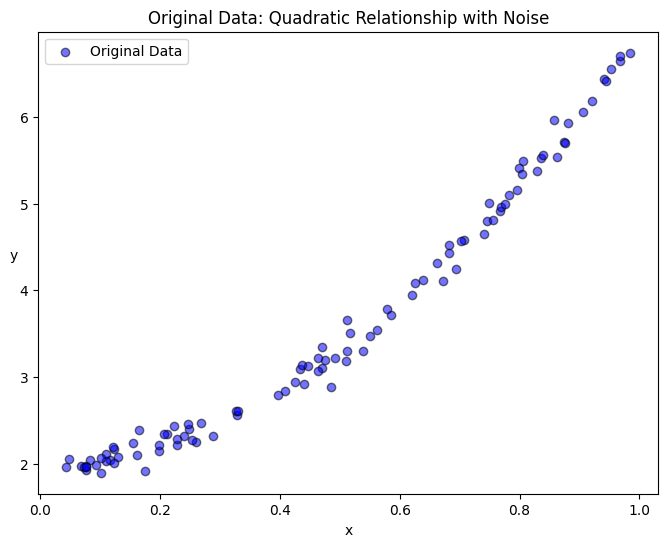

In [3]:
# PLOTTING ORIGINAL DATA
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Original Data')  # Ensure label is correctly set
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Original Data: Quadratic Relationship with Noise')
plt.legend()
plt.show()

## Theory explanation

### Introduction

We have the following quadratic polynomial function:
$$
y(x) = 2 + 5x^2 + \varepsilon
$$
where $\varepsilon$ represents added Gaussian noise.

The output of this function is determined by the value of the variable $x$, that we randomly sampled 100 times from a uniform distribution over $[0, 1)$.

Our goal is to use a **polynomial regression model** to find the best values for $\beta_0$, $\beta_1$, and $\beta_2$ so that the equation 
$$
y = \beta_0 + \beta_1x + \beta_2x^2
$$ 
fits the generated data points as closely as possible.

### The model: Polynomial regression

In general, we can write a polynomial regression model as follows:
$$
\tilde{y}_i =  \sum_{j = 0}^{p - 1} \beta_jx_i^j
$$
Where:

- $\tilde{y}_i$ is the predicted value of $y$ for the $i$-th observation.
- $\beta_j$ are the coefficients of the model.
- $x_i^j$ are the powers of the $i$-th input $x_i$.
- $p$ is the degree of the polynomial plus one.

We can also rewrite the whole equation above using the matrix notation. 

We construct a **design matrix** (also called **feature matrix**) $\mathbf{X}$ where each row corresponds to an observation $x_i$, and each column corresponds to a power of $x_i$ from $x_i^0$ (which is always 1) to $x_i^{p-1}$. 

For a dataset with $n$ observations (data points) and a polynomial of degree $p-1$, the design matrix $\mathbf{X}$ will be an $n \times p$ matrix:
$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{p-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^{p-1}
\end{bmatrix}
$$

Afterwards, we organize the coefficients $\beta_j$ into a column vector $\boldsymbol{\beta}$:
$$
\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p-1}
\end{bmatrix}
$$

Finally, the vector of predicted values $\tilde{\mathbf{y}}$ (for all observations) is then:
$$
\tilde{\mathbf{y}} = \begin{bmatrix}
\tilde{y}_1 \\
\tilde{y}_2 \\
\vdots \\
\tilde{y}_n
\end{bmatrix}
= \mathbf{X}\boldsymbol{\beta} 
$$


### Cost function: $MSE$

In order to evaluate the accuracy of the model, we need to identify a cost function that will help us determine the "*cost*" or "*loss*" associated with a given set of predictions made by the model. Specifically, we will evaluate our model using the **Mean Squared Error** ($MSE$). We indicate the cost function as $C(\beta)$, because its output is related to the chosen parameters $\beta$:
$$
C(\beta) = MSE = \frac{1}{n} \sum_{i=0}^{n-1} \left( y_i - \tilde{y}_i \right)^2
$$
Where:
- $n$ is the number of observations.
- $y_i$ is the actual value for the $i$-th observation.
- $\tilde{y_i}$ is the predicted value for the $i$-th observation.

We can rewrite the $MSE$ equation for our specific case, by expliciting the $\tilde{y}$ variable:
$$
C(\beta) = MSE = \frac{1}{n} \sum_{i=0}^{n-1} \left(y_i - \sum_{j=0}^{p-1}\beta_jx_i^j \right)^2
$$

Finally, we can formulate the above equation using matrix notation:
$$
C(\beta) = MSE = \frac{1}{n} \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right)^\top \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right)
$$

### Parameter estimation: Least squares

In order to estimate the $\beta$ parameters required by the polynomial regression model, we use the well-known **least squares method**.

We call optimal $\boldsymbol{\beta}$, denoted by $\hat{\boldsymbol{\beta}}$, the column vector that minimizes the cost function $C(\beta)$:

$$
\frac{\partial C}{\partial \boldsymbol{\beta}} = 0 = -\frac{2}{n} \mathbf{X}^\top \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right) \implies \hat{\boldsymbol{\beta}} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

After having introduced all the necessary equations, we can move on to the actual resolution of the exercise.

### Code solution

We created two different matrixes:
- The first one represents a specific case, in which the number of features is equal to 3.

$$
\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}
$$

- The second one represents a generalized case, that changes according to the given number of features (x_j).

In [4]:
# for i in range(len(x)):
#     X = np.vstack([np.ones_like(x[i]), x[i], x[i]**2]).T

In [5]:
def matrix_creation(n, p):                              # n represents the number of rows (observations), 
                                                        # while p represents the number of columns (features)
    X = np.ones((n, p))
    for i in range(len(x)):
        for j in range(p):
            X[i,j] = X[i,j] * (x[i]**j).item()
    return X

In [6]:
X = matrix_creation(n,p)

In [7]:
beta = np.linalg.pinv(X.T @ X) @ X.T @ y
beta

array([[1.9533498 ],
       [0.39090643],
       [4.61474362]])

In [8]:
y_tilde = X @ beta

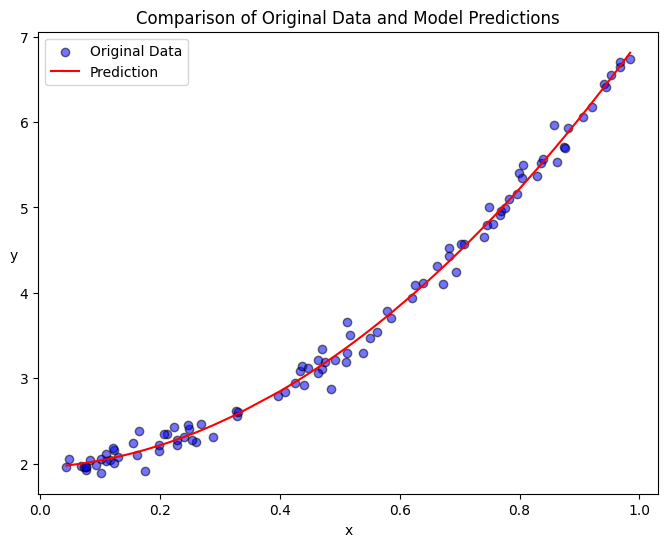

In [9]:
x_sorted = np.sort(x, axis=0)                      
y_tilde_sorted = np.sort(y_tilde, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Original Data')
plt.plot(x_sorted, y_tilde_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Comparison of Original Data and Model Predictions')
plt.legend()
plt.show()

### Mean squared error and $R^2$

In [10]:
def mse_and_r2(y_real, y_pred):
    
    mse = 1/n * (y_real - y_pred).T @ (y_real - y_pred)
    
    RSS = (y_real - y_pred).T @ (y_real - y_pred)                   
    TSS = y_real.T @ y_real - 1/n * (y_real.T @ np.ones(y_real.shape[0])) * (np.ones(y_real.shape[0]).T @ y_real)
    r2 = 1 - (RSS/TSS)
    
    print('The mean squared error is:', mse.item()) 
    print('The R2 score is:', r2.item())
    return mse.item(), r2.item()

In [11]:
mse, r2 = mse_and_r2(y, y_tilde)

The mean squared error is: 0.012079272151737923
The R2 score is: 0.9944074780456094


### Scikit-learn

In [12]:
model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False)) 

model.fit(x, y)

beta_sklearn = model.named_steps['linearregression'].coef_

print("Scikit-learn computation of parameters:", beta_sklearn)

Scikit-learn computation of parameters: [[1.9533498  0.39090643 4.61474362]]


In [13]:
y_tilde_sklearn = X @ beta_sklearn.T

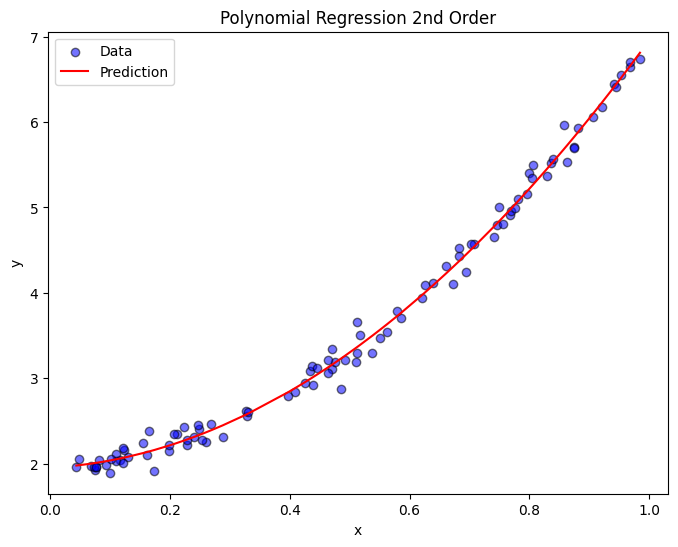

In [14]:
x_sorted = np.sort(x, axis=0)                      
y_tilde_sklearn_sorted = np.sort(y_tilde_sklearn, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.plot(x_sorted, y_tilde_sklearn_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression 2nd Order')
plt.legend()
plt.show()

In [15]:
def mse_and_r2_sklearn(y_real, y_tilde_sklearn):
    mse_sklearn = mean_squared_error(y_real, y_tilde_sklearn)
    r2_sklearn = r2_score(y_real, y_tilde_sklearn)
    print('The mean squared error computed with scikit-learn is:', mse_sklearn) 
    print('The R2 score computed with scikit-learn is:', r2_sklearn)
    return mse_sklearn, r2_sklearn

In [16]:
mse_sklearn, r2_sklearn = mse_and_r2_sklearn(y, y_tilde_sklearn)

The mean squared error computed with scikit-learn is: 0.012079272151737921
The R2 score computed with scikit-learn is: 0.9944074780456094


In [17]:
betas = []
betas.append(beta.T.tolist()[0])
betas.append(beta_sklearn.tolist()[0])

result_table = PrettyTable()

field_names = ["", "My code", "Scikit-learn"]
result_table.field_names = field_names

names = ["Intercept", "Coefficient_1", "Coefficient_2"]
for i in range(len(betas[0])):
    b = []
    for j in range(len(betas)):
        b.append(betas[j][i])
    beta_row = [names[i]] + b
    result_table.add_row(beta_row)

divider_row = ['-' * 20] * len(field_names)
result_table.add_row(divider_row)

mse_row = ["Mean Squared Error", mse, mse_sklearn]
result_table.add_row(mse_row)
r2_row = ["R2 score", r2, r2_sklearn]
result_table.add_row(r2_row)
print(result_table)

+----------------------+----------------------+----------------------+
|                      |       My code        |     Scikit-learn     |
+----------------------+----------------------+----------------------+
|      Intercept       |  1.9533497964918087  |  1.9533497964918407  |
|    Coefficient_1     |  0.3909064342588145  | 0.39090643425865723  |
|    Coefficient_2     |  4.614743624624786   |  4.614743624624829   |
| -------------------- | -------------------- | -------------------- |
|  Mean Squared Error  | 0.012079272151737923 | 0.012079272151737921 |
|       R2 score       |  0.9944074780456094  |  0.9944074780456094  |
+----------------------+----------------------+----------------------+


In [18]:
for i in range(len(beta)):
    if beta[i] > beta_sklearn[0,i]:
        print('Manually beta is bigger')
    elif beta[i] < beta_sklearn[0,i]:
        print('Manually beta is smaller')
    else:
        print('They are equal')

Manually beta is smaller
Manually beta is bigger
Manually beta is smaller


### Evaluation of the model with different noises

+----------------------+----------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+
|        Noise         |         0.1          |  0.057488669253950464 |  0.6366545815791491  |  0.7198488605163854  |  0.8555979844825322  |  0.8867627653507163  |
+----------------------+----------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+
|      Intercept       |  2.065565817052519   |   1.9775070521619018  |  2.0864084528167903  |  2.348224207695571   |  2.1013400164458598  |  1.604727186055399   |
|    Coefficient_1     | -0.24235232646032223 |  0.14527253248777816  | -0.6489689331743613  | -1.9940374557487888  |  0.907251020248868   |  1.5137272703998157  |
|    Coefficient_2     |  5.244380838756933   |   4.865528909670193   |  5.6724371117511705  |  6.898598888557772   |  3.625180976814304   |   3.81015429883975   |
| --------------

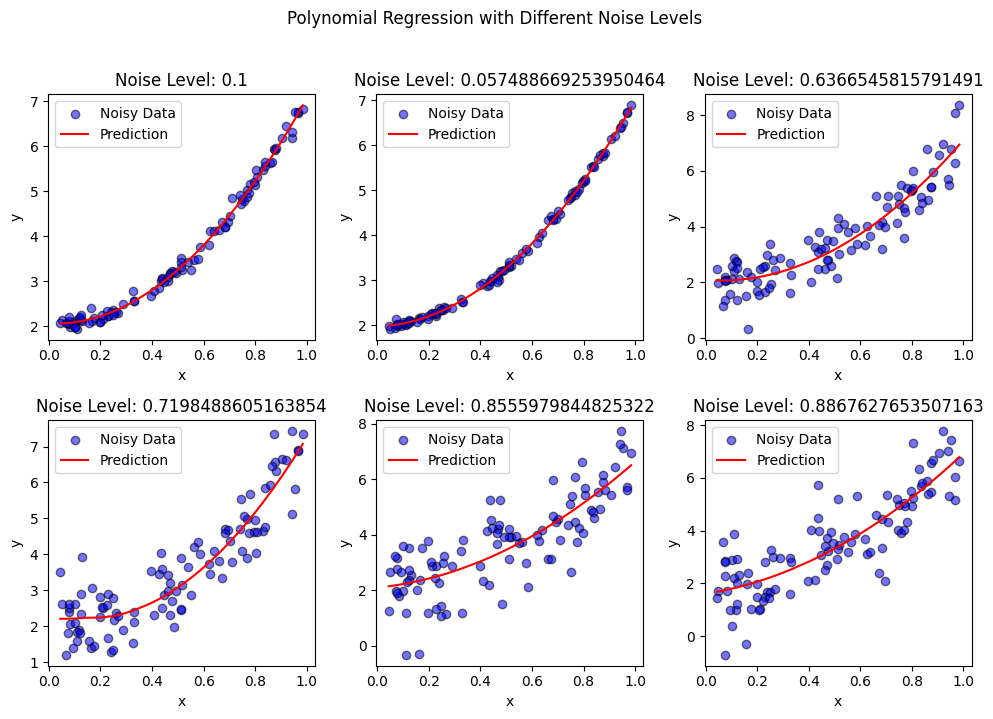

In [19]:
noises = [0.1] + np.unique(np.random.rand(5, 1)).tolist()
betas = []
mse_values = []
r2_values = []

number_row = 2
number_col = int(np.ceil(len(noises)/number_row))
fig, axes = plt.subplots(number_row, number_col, figsize=(10, 7))
axes = axes.flatten()

for i, c in enumerate(noises):
    y = 2.0 + 5*x*x + c*np.random.randn(n, 1)
    model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False))
    model.fit(x, y)
    beta_sklearn = model.named_steps['linearregression'].coef_
    betas.append(beta_sklearn.tolist()[0])
    
    y_tilde_sklearn = X @ beta_sklearn.T
    x_sorted = np.sort(x, axis=0)
    y_tilde_sklearn_sorted = np.sort(y_tilde_sklearn, axis=0)
    
    # MSE and R2
    mse = mean_squared_error(y, y_tilde_sklearn)
    r2 = r2_score(y, y_tilde_sklearn)

    mse_values.append(mse)
    r2_values.append(r2)
    
    # Subplot
    ax = axes[i]
    ax.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Noisy Data')
    ax.plot(x_sorted, y_tilde_sklearn_sorted, color='red', label='Prediction')
    ax.set_title(f'Noise Level: {c}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()


# Table
table = PrettyTable()

field_names = ["Noise"] + [f"{c}" for c in noises]
table.field_names = field_names

names = ["Intercept", "Coefficient_1", "Coefficient_2"]
for i in range(len(betas[0])):
    b = []
    for j in range(len(betas)):
        b.append(betas[j][i])
    beta_row = [names[i]] + b
    table.add_row(beta_row)

divider_row = ['-' * 20] * len(field_names)
table.add_row(divider_row)

mse_row = ["Mean Squared Error"] + mse_values
table.add_row(mse_row)
r2_row = ["R2 score"] + r2_values
table.add_row(r2_row)
print(table)


plt.suptitle('Polynomial Regression with Different Noise Levels', y = 1.02)
for j in range(len(noises), number_row * number_col):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Exercise 3: Split data in test and training data

In [20]:
np.random.seed()
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2) + np.random.normal(0, 0.1, x.shape)

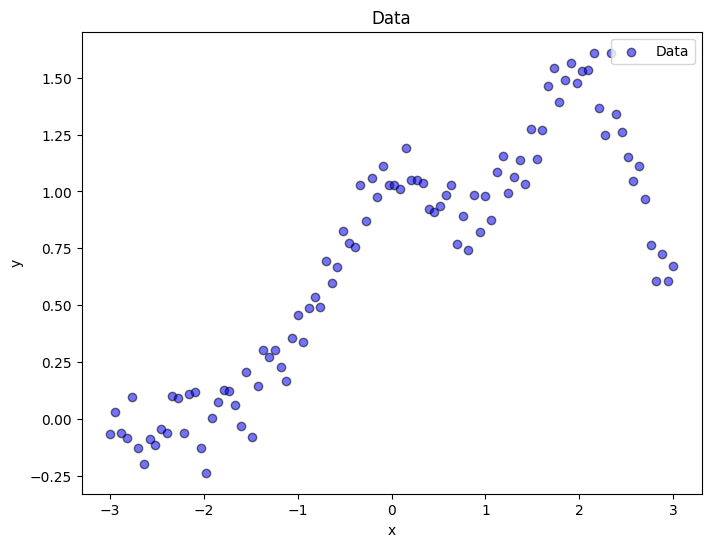

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()

In [22]:
def split_data(y, n, p, percentage):
    X = matrix_creation(n, p)
    
    train_size = int(X.shape[0] * (percentage / 100))
    portion_X_train = np.random.choice(range(0, X.shape[0]), size = train_size, replace=False)
    portion_X_test = np.setdiff1d(range(0, X.shape[0]), portion_X_train)
    
    X_train = X[portion_X_train]
    X_test = X[portion_X_test]
    y_train = y[portion_X_train]
    y_test = y[portion_X_test]
    
    return X, X_train, X_test, y_train, y_test

In [23]:
p = 6
percentage = 80

In [24]:
model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False)) 
X, X_train, X_test, y_train, y_test = split_data(y, n, p, percentage)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

table_mse_and_r2 = PrettyTable()
table_mse_and_r2.field_names = ["", "MSE", "R2"]
table_mse_and_r2.add_row(["Training set", MSE_train, R2_train])
table_mse_and_r2.add_row(["Testing set", MSE_test, R2_test])
print(table_mse_and_r2)

+--------------+----------------------+--------------------+
|              |         MSE          |         R2         |
+--------------+----------------------+--------------------+
| Training set | 0.008706886476384708 | 0.9671042278444455 |
| Testing set  | 0.006618213479552143 | 0.9784585070095992 |
+--------------+----------------------+--------------------+


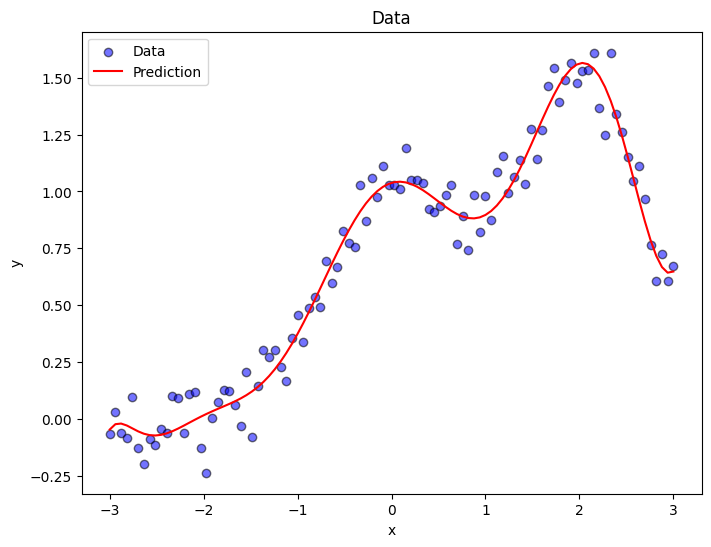

In [25]:
x_sorted = np.sort(x, axis=0)
y_line = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.plot(x_sorted, y_line, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()

### Scikit-learn

In [26]:
model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

table_shape = PrettyTable()
table_shape.field_names = ["", "MSE", "R2"]
table_shape.add_row(["Training set", MSE_train, R2_train])
table_shape.add_row(["Testing set", MSE_test, R2_test])
print(table_shape)

+--------------+----------------------+--------------------+
|              |         MSE          |         R2         |
+--------------+----------------------+--------------------+
| Training set | 0.008500692411263106 | 0.9681722845215582 |
| Testing set  | 0.008287948706650295 | 0.9738937634601522 |
+--------------+----------------------+--------------------+


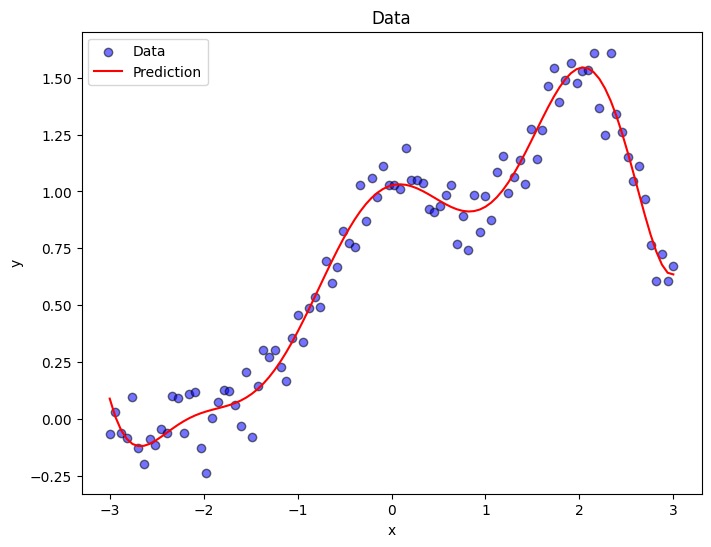

In [27]:
x_sorted = np.sort(x, axis=0)
y_line = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.plot(x_sorted, y_line, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()

In [28]:
max_degree = 16

MSE_train_values = []
MSE_test_values = []

In [29]:
for p in range(1, max_degree):
    X = matrix_creation(n, p)
    model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False)) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    MSE_train_values.append(MSE_train)
    MSE_test_values.append(MSE_test)

In [30]:
print(MSE_train_values)
print(MSE_test_values)

[0.2679729349088171, 0.05066991940553389, 0.0317959548273505, 0.018580546268359165, 0.008698422043050491, 0.008500692411263106, 0.00792305765640329, 0.007638716179734493, 0.007555286992109686, 0.007516069680119611, 0.0073333223302377015, 0.007274487063832885, 0.007145679956766603, 0.0072404292470721, 0.007467736918074922]
[0.31751523662535736, 0.056272126685028345, 0.02859981234401416, 0.016637023140249788, 0.009802981930220996, 0.008287948706650295, 0.0188412318280946, 0.010265351047795543, 0.008893267542654616, 0.010282063118050635, 0.033918136541623144, 0.12701699334734293, 0.00910033391979652, 0.0078603257451141, 6.665989213786571]


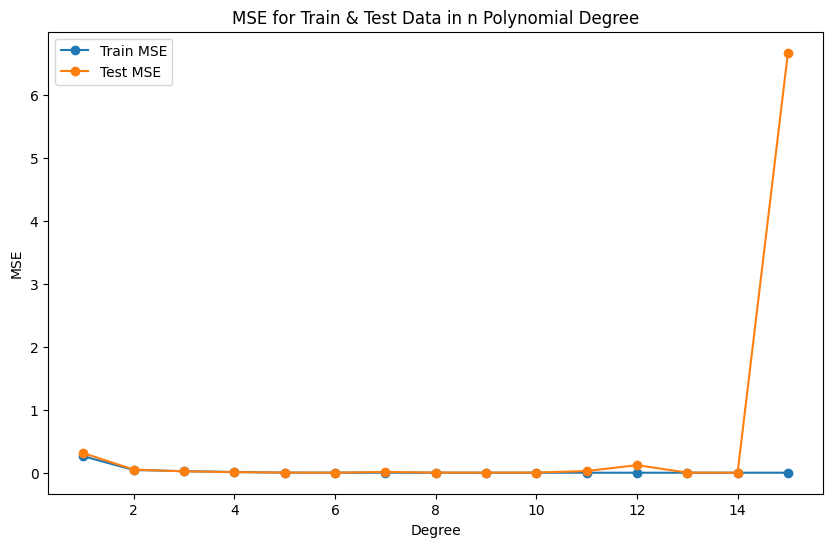

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree), MSE_train_values, label='Train MSE', marker='o')
plt.plot(range(1, max_degree), MSE_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE for Train & Test Data in n Polynomial Degree')
plt.legend()
plt.show()